<a href="https://colab.research.google.com/github/pranilthorat/almabetter-capstone-project-4-Netflix-Movies-and-TV-Shows-Clustering/blob/main/capstone_project_(4)_GITHUB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# Attribute Information

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from scipy import stats
import pylab
import time
from datetime import datetime
from datetime import timedelta
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#nltk import
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [3]:
df=pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df=pd.DataFrame(df)

In [4]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.drop(['director'],axis=1,inplace=True)
df_cleaned=df.dropna(subset=['cast','country','date_added','rating'],axis=0)

In [6]:
df_cleaned['country']=df_cleaned['country'].apply(lambda x:x.split(","))

In [7]:
df_new=pd.DataFrame(columns=df_cleaned.columns)

In [8]:
indic=0
count=0
for index, row in df_cleaned.iterrows():
    if len(df_cleaned.loc[index,'country'])>1:
      count=len(df_cleaned.loc[index,'country'])+count
      for data in df_cleaned.loc[index,'country']:
        country_name=[]
        indic=indic+0
        country_name_list=list(df_cleaned.loc[index])
        country_name.append(data)
        country_name_list[4]=country_name
        df_new.loc[indic]=country_name_list
        indic=indic+1
      df_cleaned.drop(index,inplace=True)

In [9]:
df_cleaned.reset_index(drop=True,inplace=True)
df_clean_frame=df_cleaned.append(df_new,ignore_index=True)

In [10]:
df_clean_frame['country']=df_clean_frame['country'].apply(lambda x:x[0])
df_clean_frame['date_added']=df_clean_frame['date_added'].apply(lambda x:x.strip())
df_clean_frame['date_added']=df_clean_frame['date_added'].apply(lambda x:datetime.strptime(x,'%B %d, %Y'))
df_clean_frame['release_year']=df_clean_frame['release_year'].astype('int')

In [11]:
df_clean_frame.rename(columns={'type':'Type_of_show','title':'Title_of_Movie/show','cast':'Actors','date_added':'Date_Added_in_netflix','release_year':'Release_year','rating':'Ratings','listed_in':'Genre'},inplace=True)

In [12]:
df_clean_frame.drop([6361,6527],inplace=True)
df_clean_frame.reset_index(drop=True,inplace=True)

In [13]:
df_clean_frame.dtypes

show_id                          object
Type_of_show                     object
Title_of_Movie/show              object
Actors                           object
country                          object
Date_Added_in_netflix    datetime64[ns]
Release_year                      int64
Ratings                          object
duration                         object
Genre                            object
description                      object
dtype: object

# **EDA**

In [14]:
#Movies and Tv Shows available on netflix
movies_and_tv_shows=df_clean_frame['Type_of_show'].value_counts().reset_index()
movies_and_tv_shows

,index,Type_of_show
0,Movie,6080
1,TV Show,2182


In [16]:
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
import plotly.express as px

In [17]:
#visualising What is more popular on Netflix, movies or TV shows
(px.bar(movies_and_tv_shows, x="index",y="Type_of_show", color="index")
.update_layout(title_font_size=50)
.update_xaxes(showgrid=True)
).show()

In [18]:
#top_two countries where netflix is most popular
top_two=df_clean_frame['country'].value_counts().head(3).reset_index()
top_two

,index,country
0,United States,2541
1,India,927
2,United Kingdom,499


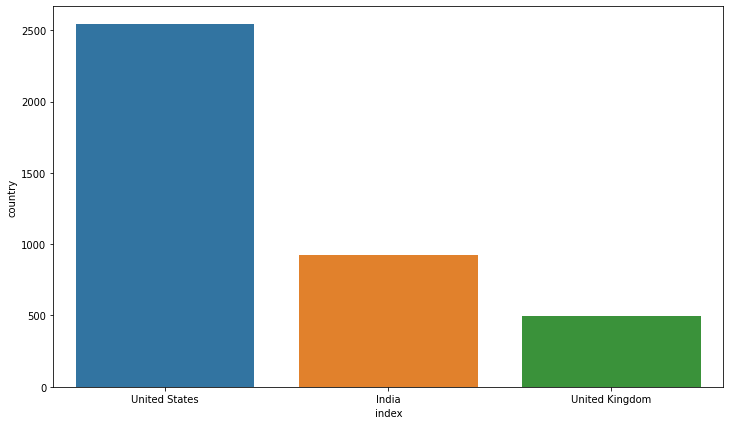

In [19]:
#Visualising Which are the top two countries using Netfilx
plt.figure(figsize=(12,7))
sns.barplot(x=top_two['index'],y=top_two['country'])

# 4. Clustering similar content by matching text-based features

In [20]:
df_clean_frame.head()

,show_id,Type_of_show,Title_of_Movie/show,Actors,country,Date_Added_in_netflix,Release_year,Ratings,duration,Genre,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [21]:
#importing the libraries for cluster
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
#using tolist() function to Convert description column to list 
content = df_clean_frame['description'].tolist()
content

['In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.',
 'After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.',
 "When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",
 'In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group.',
 'A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.',
 'A genetics professor experiments with a treatment for his comatose sister that blends medical and shamanic cures, but unlocks a shocking side effect.',
 'After an awful accident, a couple admitted to a grisly hospital are separated and must find each o

In [23]:
#using  lower() method for Changing the string into lower case
content = [low.lower() for low in content]
#using sub() function for Handling all the urls and (@) present in content variable 
content = [re.sub("\w+://\S+","", urls) for urls in content]
content =[re.sub("@\w+","", handles) for handles in content]

In [24]:
#using tokenization functions for the text present in content variable
content= [word_tokenize(word) for word in content]

In [25]:
#Removing stopwords and punctuation from the description feature 
removing_stopwords= stopwords.words("english")
removing_punctuation= list(punctuation)
removing_punctuation.extend(['...','``',"''",".."])
removing_context= ['rt', 'amp',"'s"]
final_variable= removing_stopwords + removing_punctuation + removing_context

In [26]:
#defining final_stop function to remove the stop words
def final_stop(final):
    return [re.sub("#","",term) for term in final if ((term not in final_variable) & (len(term)>1))]
content_clean = [final_stop(clean) for clean in content]

In [27]:
#creating a cleaned_list where all the words of the cleaned data is present and getting top 10 words using counter over top_term variable 
cleaned_list= []
for i in content_clean:
    cleaned_list.extend(i)
top_terms= Counter(cleaned_list)
top_terms.most_common(10)

[('young', 778),
 ('life', 714),
 ('new', 655),
 ('family', 610),
 ('man', 529),
 ('world', 502),
 ('woman', 488),
 ('love', 446),
 ('two', 445),
 ('must', 411)]

In [28]:
#using join method to form a string by Joining all the words 
content_clean = [" ".join(label) for label in content_clean]

In [29]:
#tfid_vectorizer variable 
tfid_vectorizer= TfidfVectorizer(max_features=4000)

In [30]:
#using tfid_vectorizer for fiting content_clean variable and converting it into arrays 
content_tfidf = tfid_vectorizer.fit_transform(content_clean).toarray()

In [31]:
#shape of content_tfidf
content_tfidf.shape

(8262, 4000)

In [32]:
#content_tfidf
content_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
#fiting content_tfidf variable in model and checking sse
sse=[]
for i in range(1,39):
    model = KMeans(n_clusters=i)
    model.fit(content_tfidf)
    error = model.inertia_
    sse.append(error)
    print('cluster: %d \t SSE: %0.2f'%(i,error))

cluster: 1 	 SSE: 8201.25
cluster: 2 	 SSE: 8179.45
cluster: 3 	 SSE: 8160.38
cluster: 4 	 SSE: 8147.72
cluster: 5 	 SSE: 8131.09
cluster: 6 	 SSE: 8114.73
cluster: 7 	 SSE: 8104.35
cluster: 8 	 SSE: 8091.97
cluster: 9 	 SSE: 8075.63
cluster: 10 	 SSE: 8067.89
cluster: 11 	 SSE: 8052.96
cluster: 12 	 SSE: 8039.71
cluster: 13 	 SSE: 8030.87
cluster: 14 	 SSE: 8016.24
cluster: 15 	 SSE: 8011.00
cluster: 16 	 SSE: 8007.21
cluster: 17 	 SSE: 7994.85
cluster: 18 	 SSE: 7983.01
cluster: 19 	 SSE: 7980.01
cluster: 20 	 SSE: 7969.96
cluster: 21 	 SSE: 7967.21
cluster: 22 	 SSE: 7954.92
cluster: 23 	 SSE: 7949.21
cluster: 24 	 SSE: 7944.41
cluster: 25 	 SSE: 7929.36
cluster: 26 	 SSE: 7923.55
cluster: 27 	 SSE: 7912.75
cluster: 28 	 SSE: 7910.65
cluster: 29 	 SSE: 7911.08
cluster: 30 	 SSE: 7905.90
cluster: 31 	 SSE: 7899.68
cluster: 32 	 SSE: 7887.26
cluster: 33 	 SSE: 7888.31
cluster: 34 	 SSE: 7882.85
cluster: 35 	 SSE: 7870.96
cluster: 36 	 SSE: 7869.02
cluster: 37 	 SSE: 7866.82
cluster: 3

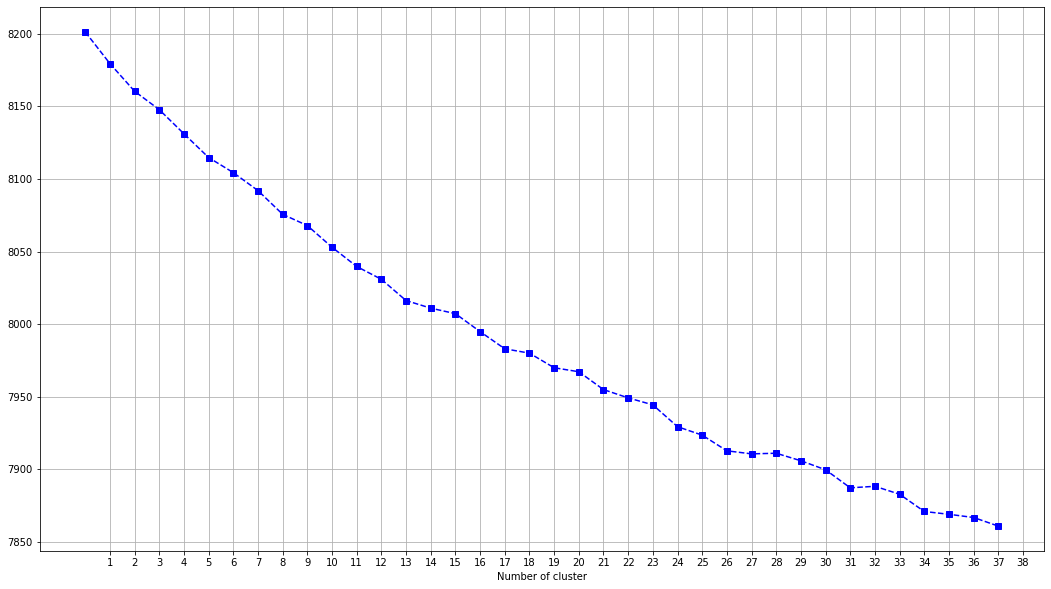

In [34]:
#giving figure.figsize to visualize it in better way
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
#elbow method and the range of clusters are varying from 1 to 39 
plt.plot(sse,'bs--')
plt.xticks(list(range(1,39)),list(range(1,39)))
plt.grid(),plt.xlabel('Number of cluster')
plt.show()

In [35]:
#sillhoute score of clusters 
sill = [] 
for i in range(2,39):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(content_tfidf)
    y1 = model.predict(content_tfidf)
    score = silhouette_score(content_tfidf,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

cluster: 2 	 Sillhoute: 0.0017
cluster: 3 	 Sillhoute: 0.0020
cluster: 4 	 Sillhoute: 0.0027
cluster: 5 	 Sillhoute: 0.0032
cluster: 6 	 Sillhoute: 0.0036
cluster: 7 	 Sillhoute: 0.0040
cluster: 8 	 Sillhoute: 0.0041
cluster: 9 	 Sillhoute: 0.0050
cluster: 10 	 Sillhoute: 0.0054
cluster: 11 	 Sillhoute: 0.0061
cluster: 12 	 Sillhoute: 0.0060
cluster: 13 	 Sillhoute: 0.0060
cluster: 14 	 Sillhoute: 0.0068
cluster: 15 	 Sillhoute: 0.0066
cluster: 16 	 Sillhoute: 0.0071
cluster: 17 	 Sillhoute: 0.0077
cluster: 18 	 Sillhoute: 0.0080
cluster: 19 	 Sillhoute: 0.0083
cluster: 20 	 Sillhoute: 0.0085
cluster: 21 	 Sillhoute: 0.0086
cluster: 22 	 Sillhoute: 0.0087
cluster: 23 	 Sillhoute: 0.0091
cluster: 24 	 Sillhoute: 0.0089
cluster: 25 	 Sillhoute: 0.0092
cluster: 26 	 Sillhoute: 0.0097
cluster: 27 	 Sillhoute: 0.0094
cluster: 28 	 Sillhoute: 0.0103
cluster: 29 	 Sillhoute: 0.0096
cluster: 30 	 Sillhoute: 0.0106
cluster: 31 	 Sillhoute: 0.0102
cluster: 32 	 Sillhoute: 0.0101
cluster: 33 	 Si